In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load your dataset
data = pd.read_csv('/content/Crop_recommendation.csv')


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<ipython-input-11-6b0080377e25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=data, order=data['label'].value_counts().index, palette='viridis')


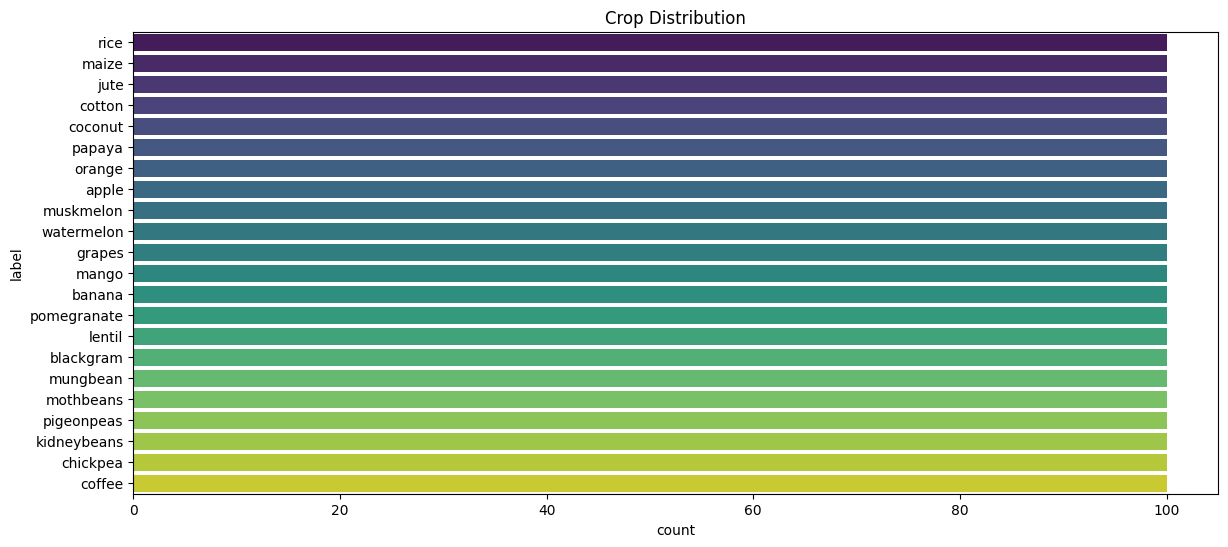

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(y='label', data=data, order=data['label'].value_counts().index, palette='viridis')
plt.title('Crop Distribution')
plt.show()


# **Pair plot**

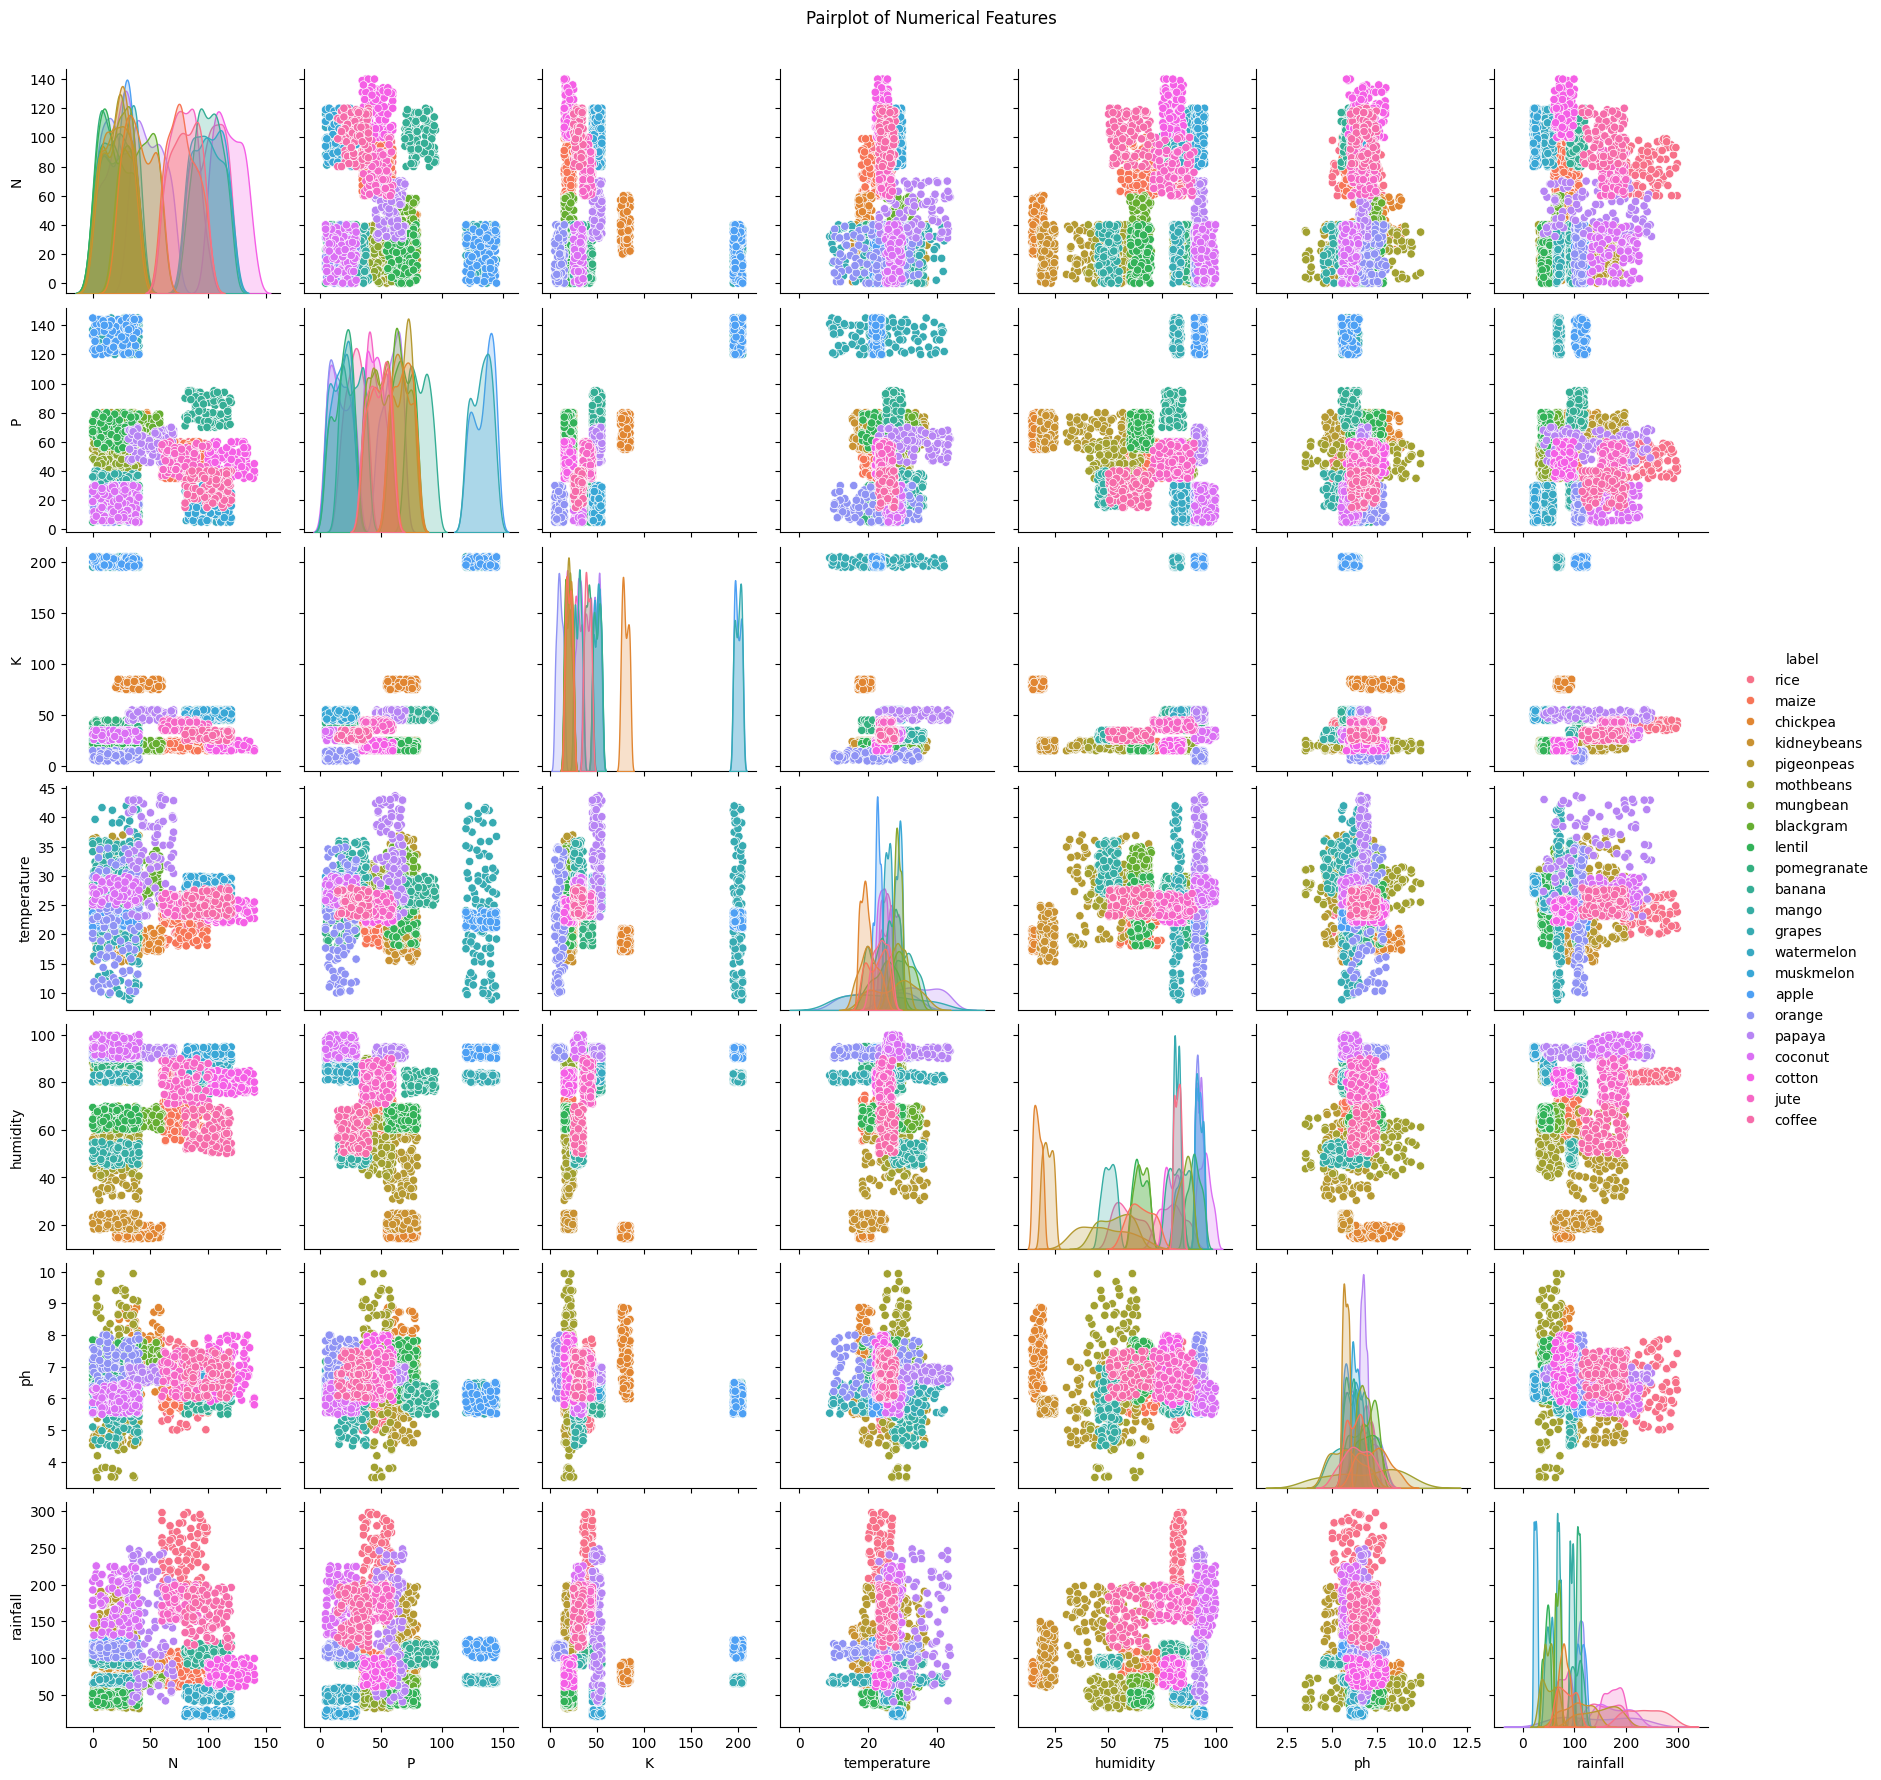

In [ ]:
sns.pairplot(data,hue='label')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Coorelation analysis

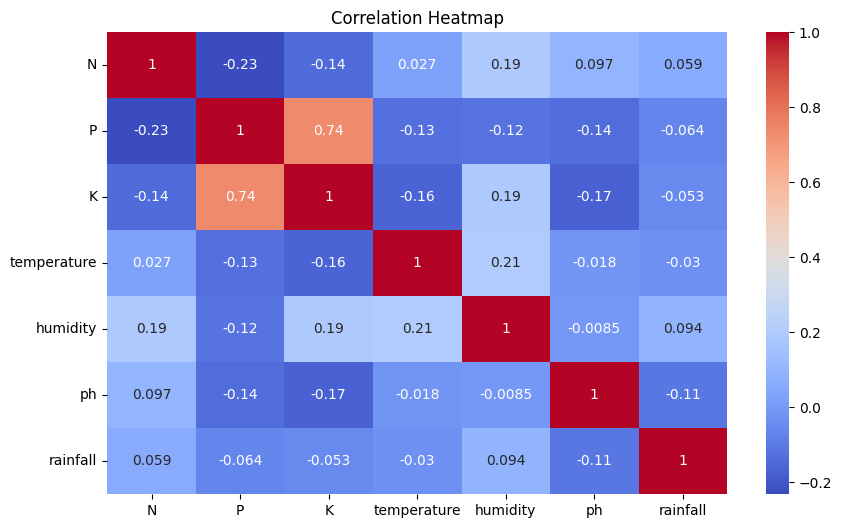

In [ ]:
numerical_columns = data.select_dtypes(exclude='object')


plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:

# Encode the labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Define features (X) and the target (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 99.32%
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.

In [ ]:
import numpy as np
# Predict function to take new inputs and make predictions
def predict_crop(N, P, K, temperature, humidity, pH, rainfall):
    # Prepare the input data in the same format as the training data
    input_data = np.array([[N, P, K, temperature, humidity, pH, rainfall]])

    # Use the trained model to make a prediction
    prediction = rf_classifier.predict(input_data)

    # Decode the predicted label back to the crop name
    predicted_crop = label_encoder.inverse_transform(prediction)[0]

    return predicted_crop


# Example usage to predict the output for new inputs
N = 90  # Example Nitrogen value
P = 40  # Example Phosphorus value
K = 42  # Example Potassium value
temperature = 24.0  # Example temperature
humidity = 80.0  # Example humidity
pH = 6.5  # Example pH value
rainfall = 200.0  # Example rainfall

# Get the predicted crop
predicted_crop = predict_crop(N, P, K, temperature, humidity, pH, rainfall)
print(f"The recommended crop is: {predicted_crop}")

The recommended crop is: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(rf_classifier,open('crop_model1.pkl','wb'))

In [ ]:
from google.colab import files
files.download('crop_model1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save the model
joblib.dump(rf_classifier, 'crop_model2.joblib')

# Load the model
rf_classifier = joblib.load('crop_model2.joblib')


In [ ]:
from google.colab import files
files.download('crop_model2.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>